<a href="https://colab.research.google.com/github/Pratibakb/nlp-language-identifier/blob/main/Language_Detection_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore')

In [ ]:
data= pd.read_csv('/content/Language Detection.csv')

In [ ]:
data.head()

,Text,Language
0,"Nature, in the broadest sense, is the natural...",English
1,"""Nature"" can refer to the phenomena of the phy...",English
2,"The study of nature is a large, if not the onl...",English
3,"Although humans are part of nature, human acti...",English
4,[1] The word nature is borrowed from the Old F...,English


In [ ]:
df=data[['Text','Language']]
df.head()

,Text,Language
0,"Nature, in the broadest sense, is the natural...",English
1,"""Nature"" can refer to the phenomena of the phy...",English
2,"The study of nature is a large, if not the onl...",English
3,"Although humans are part of nature, human acti...",English
4,[1] The word nature is borrowed from the Old F...,English


In [ ]:
df['Language'].value_counts()

,count
Language,
English,1385
French,1014
Spanish,819
Portugeese,739
Italian,698
Russian,692
Sweedish,676
Malayalam,594
Dutch,546


In [ ]:
X=df['Text']
y=df['Language']

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y=le.fit_transform(y)

In [ ]:
data_list=[]
for text in X:
  text=re.sub(r'[!@#$(),\n"%^*?\:;~`0-9]','',text)
  text=re.sub(r'[[]]',"",text)
  text=text.lower()
  data_list.append(text)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
X=cv.fit_transform(data_list).toarray()

In [ ]:
X.shape

(10337, 39419)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(X,y,test_size= 0.20)

In [ ]:
from sklearn.naive_bayes import MultinomialNB
model=MultinomialNB()
model.fit(x_train,y_train)

MultinomialNB()

In [ ]:
y_pred= model.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
ac=accuracy_score(y_test,y_pred)
cm=confusion_matrix(y_test,y_pred)
cr= classification_report(y_test,y_pred)

In [ ]:
print('Accuracy is:',ac)

Accuracy is: 0.980174081237911


In [ ]:
print(cr)

              precision    recall  f1-score   support

           0       1.00      0.97      0.99       110
           1       1.00      0.95      0.97        98
           2       1.00      0.98      0.99       108
           3       0.91      1.00      0.95       291
           4       0.99      0.98      0.98       207
           5       0.99      0.99      0.99        80
           6       1.00      0.96      0.98        76
           7       1.00      1.00      1.00         9
           8       0.99      0.98      0.99       129
           9       1.00      0.96      0.98        81
          10       0.99      0.99      0.99       119
          11       1.00      0.99      1.00       153
          12       1.00      0.99      1.00       136
          13       0.98      0.97      0.97       152
          14       0.98      0.96      0.97       135
          15       1.00      0.97      0.98        97
          16       1.00      0.99      0.99        87

    accuracy              

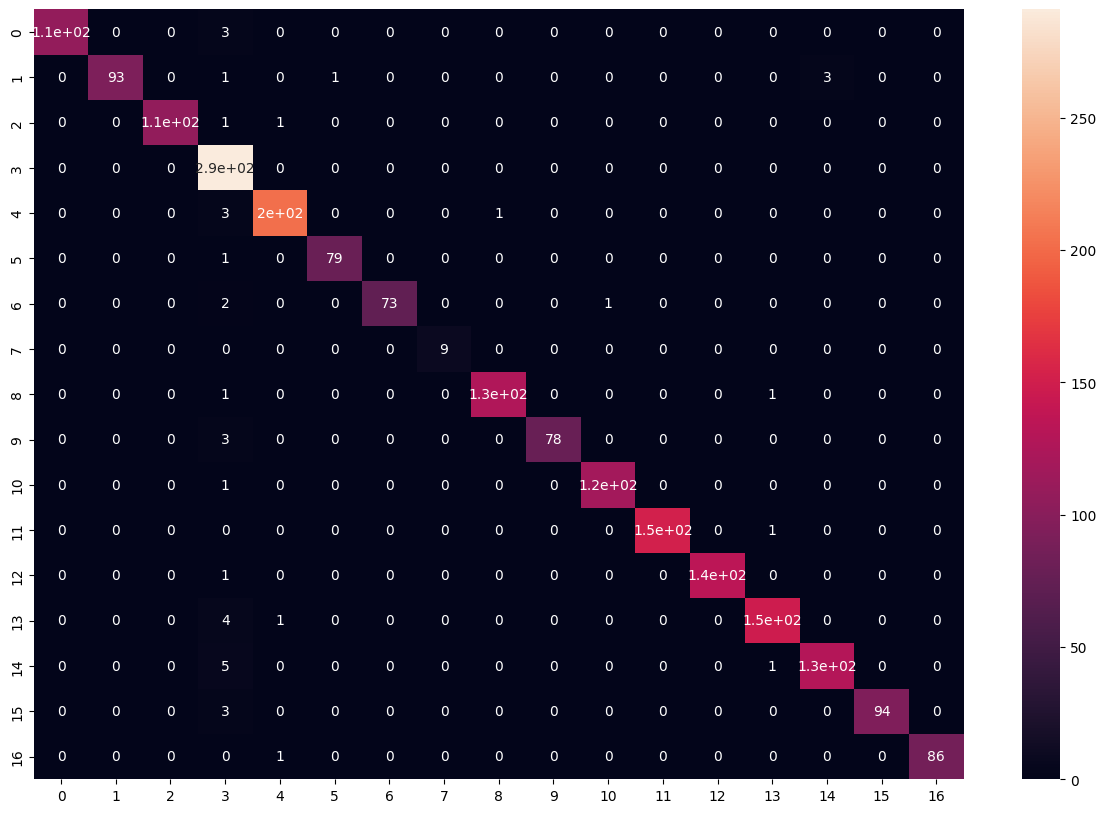

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(cm,annot=True)
plt.show()

In [ ]:
def predict(text):
  x=cv.transform([text]).toarray()
  lang=model.predict(x)
  lang=le.inverse_transform(lang)
  print("The language is in",lang[0])

In [ ]:
predict('Ball provides a community based knowledge portal for playing with study')

The language is in English


In [ ]:
predict("Non, pas du tout")

The language is in French


In [ ]:
predict("ಹಾಯ್ ನಿಮ್ಮನ್ನು ಭೇಟಿಯಾಗಲು ಸಂತೋಷವಾಗಿದೆ")

The language is in Kannada


In [26]:
predict("Как у тебя дела?")

The language is in Russian


In [27]:
predict("un hombre")

The language is in Spanish


In [28]:
predict("Πώς είσαι;")

The language is in Greek


In [29]:
predict("Hur mår du?")

The language is in Sweedish


In [30]:
predict("நீங்கள் எப்படி இருக்கிறீர்கள்")

The language is in Tamil


In [31]:
predict("Hoe gaat het met je?")

The language is in Dutch


In [32]:
predict("Nasılsın?")

The language is in Turkish
